In [18]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [19]:
data = pd.read_excel('CSTR_Data.xlsx').values

In [20]:
data = data[:, 1:]
F_by_V = data[:, 0]
CAf = data[:, 1]
CBf = data[:, 2]
CCf = data[:, 3]
CDf = data[:, 4]
CA = data[:, 5]
CB = data[:, 6]
CC = data[:, 7]
CD = data[:, 8]
tt = data.shape[0]  # Total data
tn = int(0.6 * tt)  # Total Number of Training Data
tv = tt - tn  # Total Number of Validation Data
nt = 9  # Total number of variables
ni = 5  # Number of neurons in Input Layer
no = 4  # Number of neurons in Output Layer

In [21]:
norm_mat = np.zeros((tt, nt))
delta = np.zeros(nt)
for i in range(nt):
    delta[i] = np.max(data[:, i]) - np.min(data[:, i])
    norm_mat[:, i] = (data[:, i] - np.min(data[:, i])) / delta[i]  # Max-Min Normalization

In [22]:
dsr = norm_mat[:, 5:9].T  # Target array
Imat = norm_mat[:, 0:5].T
dsr_t=dsr[: , :int(0.6 * dsr.shape[1])]
Imat_t=Imat[: , :int(0.6 * Imat.shape[1])]
dsr_v = dsr[:, -int(0.4 * dsr.shape[1]):]
Imat_v = Imat[:, -int(0.4 * Imat.shape[1]):]

In [23]:
# Number of centers of RBFs
tc = 100

# Getting coordinates of the centres
distances = np.zeros(len(Imat_t[1]))
mean1=np.mean(Imat_t[:,0])
mean2=np.mean(Imat_t[:,1])
mean3=np.mean(Imat_t[:,2])
mean4=np.mean(Imat_t[:,3])
mean5=np.mean(Imat_t[:,4])
mean = np.array([mean1, mean2, mean3, mean4, mean5])
for i in range(len(Imat_t)):
    for j in range(ni):
        distances[i]+=Imat_t[j][i]-mean[j]
indices = np.argsort(distances)   # Sorting the distances and get corresponding indices
# for l in range(tc):
#     centermat=Imat_t[indices[l]]
centermat = Imat_t[:,indices[:tc]]   # Select 'tc'-nearest neighbors as the centres

#Getting width
#sigma = 2
kmeans = KMeans(n_clusters=tc)
kmeans.fit(Imat_t.T)
centers = kmeans.cluster_centers_.T
sigma = np.mean(np.linalg.norm(centermat - centers, axis=0))

#Getting Weights by Least Square method
D = np.zeros((tc, tn))
for i in range(tc):
    for j in range(tn):
        D[i, j] = np.linalg.norm(centermat[:, i] - Imat_t[:, j])
PhiofD = 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-D**2 / (2 * sigma**2))  
z = np.linalg.pinv(PhiofD.T) @ dsr_t.T

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#Training

In [24]:
D = np.zeros((tc, tn))
for i in range(tc):
    for j in range(tn):
        D[i, j] = np.linalg.norm(centermat[:, i] - Imat_t[:, j])
yHL = 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-D**2 / (2 * sigma**2))
ynn_tv = np.dot(yHL.T, z)  # Prediction of Training Data
dsr_t_v = dsr_t.T*delta[ni:] + np.min(data[:, ni:], axis=0)
ynn_t_v = ynn_tv*delta[ni:] + np.min(data[:, ni:], axis=0)

In [25]:
yHL.shape

(100, 3000)

<Figure size 640x480 with 0 Axes>

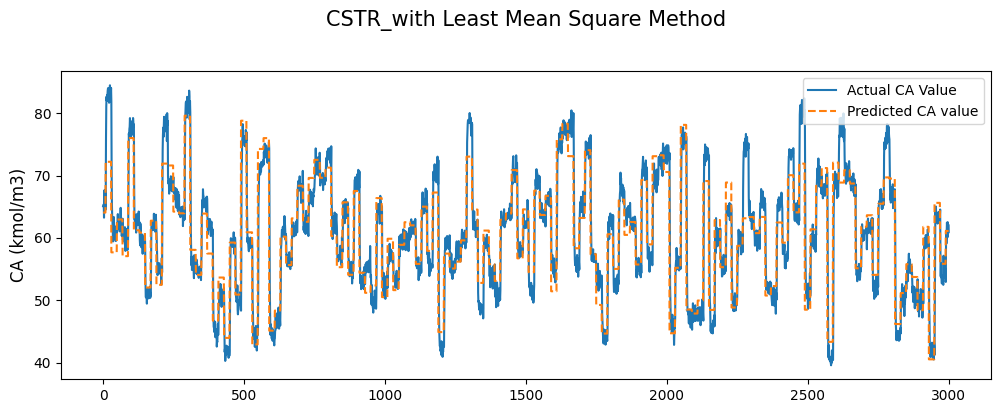

<Figure size 640x480 with 0 Axes>

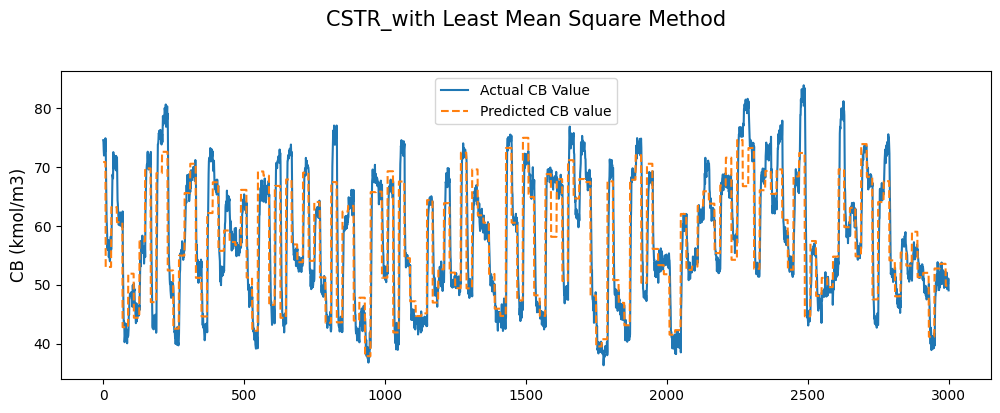

<Figure size 640x480 with 0 Axes>

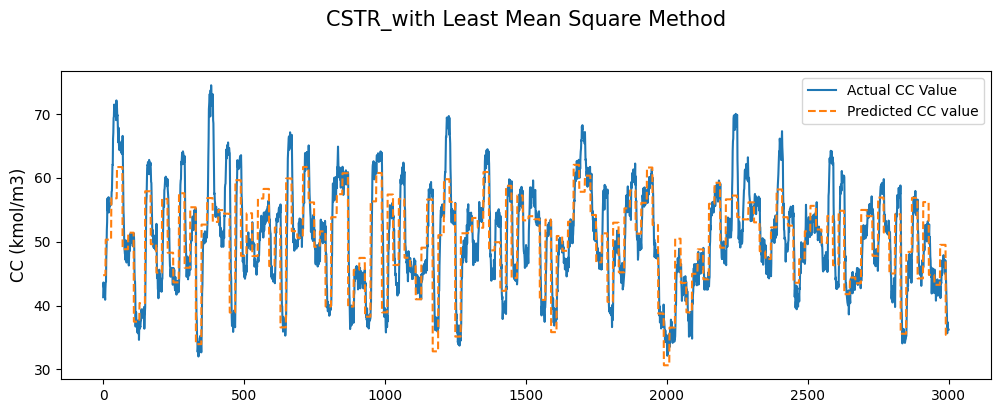

<Figure size 640x480 with 0 Axes>

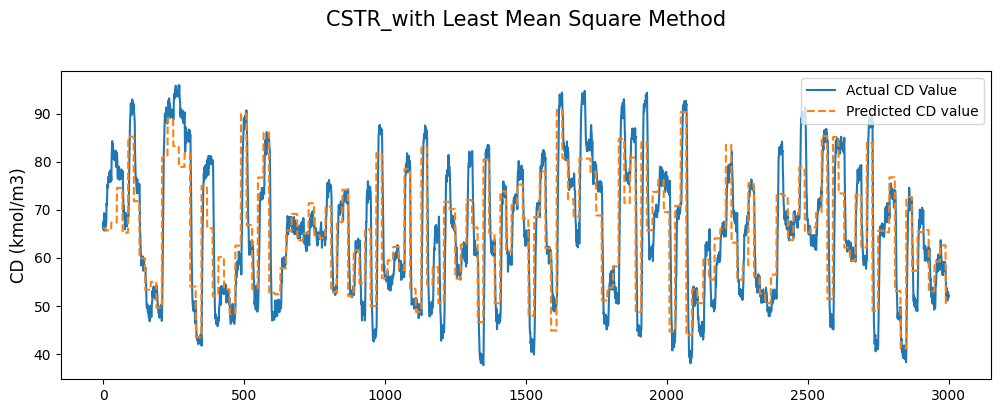

In [26]:
plt.figure(1)
plt.figure(figsize=(12, 4))
plt.title("CSTR_with Least Mean Square Method", fontsize=15 ,y=1.12)
plt.ylabel('CA (kmol/m3)', fontsize=12)
plt.plot( dsr_t_v[:, 0])
plt.plot( (ynn_t_v[:, 0]), '--')
plt.legend(["Actual CA Value", "Predicted CA value"])
plt.show()

plt.figure(2)
plt.figure(figsize=(12, 4))
plt.title("CSTR_with Least Mean Square Method", fontsize=15 ,y=1.12)
plt.ylabel('CB (kmol/m3)', fontsize=12)
plt.plot( dsr_t_v[:, 1])
plt.plot( (ynn_t_v[:, 1]), '--')
plt.legend(["Actual CB Value", "Predicted CB value"])
plt.show()

plt.figure(3)
plt.figure(figsize=(12, 4))
plt.title("CSTR_with Least Mean Square Method", fontsize=15 ,y=1.12)
plt.ylabel('CC (kmol/m3)', fontsize=12)
plt.plot( dsr_t_v[:, 2])
plt.plot( (ynn_t_v[:, 2]), '--')
plt.legend(["Actual CC Value", "Predicted CC value"])
plt.show()

plt.figure(4)
plt.figure(figsize=(12, 4))
plt.title("CSTR_with Least Mean Square Method", fontsize=15 ,y=1.12)
plt.ylabel('CD (kmol/m3)', fontsize=12)
plt.plot( dsr_t_v[:, 3])
plt.plot( (ynn_t_v[:, 3]), '--')
plt.legend(["Actual CD Value", "Predicted CD value"])
plt.show()

In [27]:
rmse_1_t = np.sqrt(np.mean((dsr_t_v[:, 0] - ynn_t_v[:, 0])**2))
rmse_2_t = np.sqrt(np.mean((dsr_t_v[:, 1] - ynn_t_v[:, 1])**2))
rmse_3_t = np.sqrt(np.mean((dsr_t_v[:, 2] - ynn_t_v[:, 2])**2))
rmse_4_t = np.sqrt(np.mean((dsr_t_v[:, 3] - ynn_t_v[:, 3])**2))
(rmse_1_t+rmse_2_t+rmse_3_t+rmse_4_t)/4

5.615884711316016

#Validation

In [28]:
Dv = np.zeros((tc, tv))
for i in range(tc):
    for j in range(tv):
        Dv[i, j] = np.linalg.norm(centermat[:, i] - Imat_v[:, j])
yHL = 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-Dv**2 / (2 * sigma**2))
ynn_v = np.dot(yHL.T, z)
dsr_v_p = dsr_v.T * delta[ni:] + np.min(data[:, ni:], axis=0)
ynn_v_p = ynn_v * delta[ni:] + np.min(data[:, ni:], axis=0)

In [29]:
dsr_v_p.shape

(2000, 4)

<Figure size 640x480 with 0 Axes>

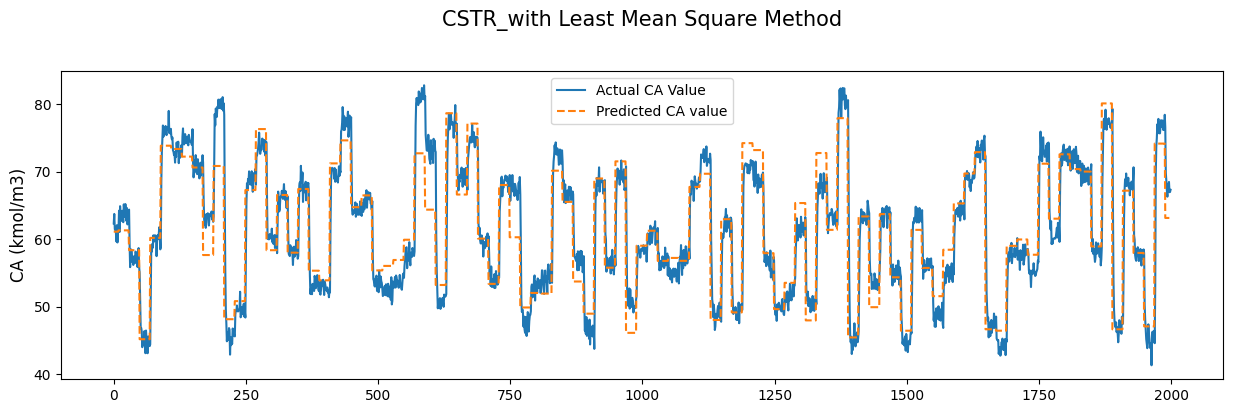

<Figure size 640x480 with 0 Axes>

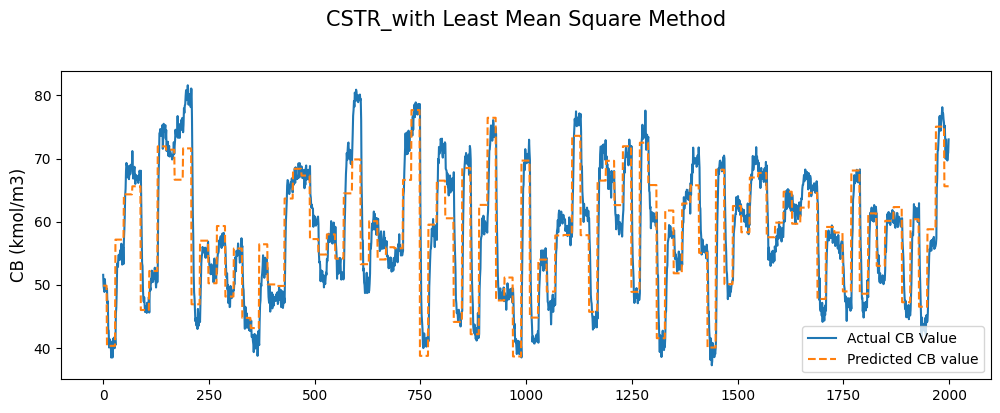

<Figure size 640x480 with 0 Axes>

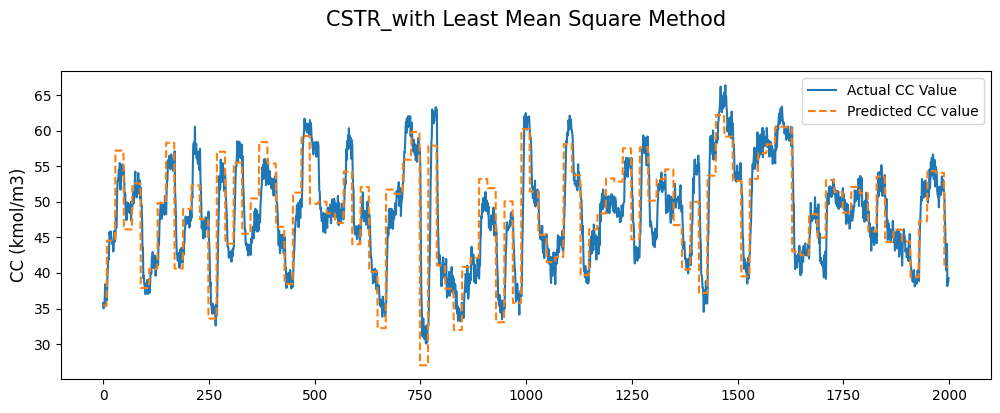

<Figure size 640x480 with 0 Axes>

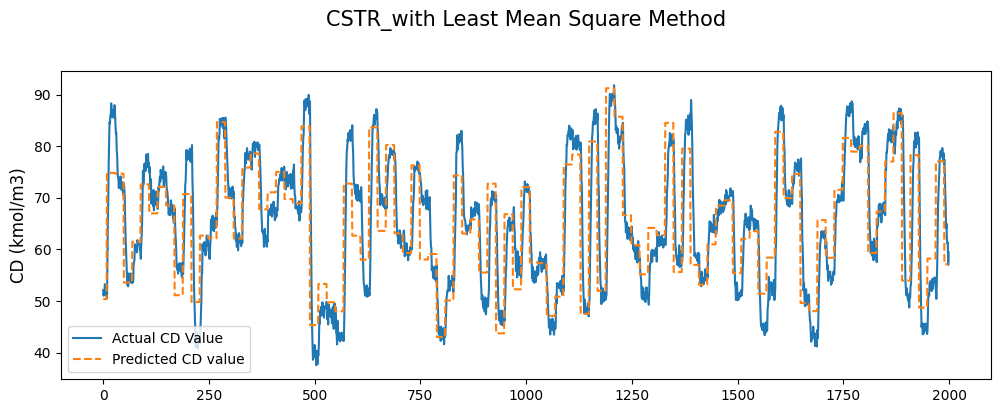

In [30]:
plt.figure(5)
plt.figure(figsize=(15, 4))
plt.title("CSTR_with Least Mean Square Method", fontsize=15 ,y=1.12)
plt.ylabel('CA (kmol/m3)', fontsize=12)
plt.plot( dsr_v_p[:, 0])
plt.plot( (ynn_v_p[:, 0]), '--')
plt.legend(["Actual CA Value", "Predicted CA value"])
plt.show()

plt.figure(6)
plt.figure(figsize=(12, 4))
plt.title("CSTR_with Least Mean Square Method", fontsize=15 ,y=1.12)
plt.ylabel('CB (kmol/m3)', fontsize=12)
plt.plot( dsr_v_p[:, 1])
plt.plot( (ynn_v_p[:, 1]), '--')
plt.legend(["Actual CB Value", "Predicted CB value"])
plt.show()

plt.figure(7)
plt.figure(figsize=(12, 4))
plt.title("CSTR_with Least Mean Square Method", fontsize=15 ,y=1.12)
plt.ylabel('CC (kmol/m3)', fontsize=12)
plt.plot( dsr_v_p[:, 2])
plt.plot( (ynn_v_p[:, 2]), '--')
plt.legend(["Actual CC Value", "Predicted CC value"])
plt.show()

plt.figure(8)
plt.figure(figsize=(12, 4))
plt.title("CSTR_with Least Mean Square Method", fontsize=15 ,y=1.12)
plt.ylabel('CD (kmol/m3)', fontsize=12)
plt.plot( dsr_v_p[:, 3])
plt.plot( (ynn_v_p[:, 3]), '--')
plt.legend(["Actual CD Value", "Predicted CD value"])
plt.show()

In [31]:
rmse_1_v = np.sqrt(np.mean((dsr_v_p[:, 0] - ynn_v_p[:, 0])**2))
rmse_2_v = np.sqrt(np.mean((dsr_v_p[:, 1] - ynn_v_p[:, 1])**2))
rmse_3_v = np.sqrt(np.mean((dsr_v_p[:, 2] - ynn_v_p[:, 2])**2))
rmse_4_v = np.sqrt(np.mean((dsr_v_p[:, 3] - ynn_v_p[:, 3])**2))
(rmse_1_v+rmse_2_v+rmse_3_v+rmse_4_v)/4

5.401058565901743